In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import *

In [5]:
#划分训练集和测试集
def split_data(X, Y):
    data = np.hstack((X,Y))   #将X,Y矩阵合并
    np.random.shuffle(data)   #随机打乱
    data_train = data[0:120, :]   #80%作为训练集
    data_test = data[120:150, :]    #20%作为测试集
    X_train = data_train[:, 0:4].T
    Y_train = data_train[:, 4].reshape((1,120))
    X_test = data_test[:, 0:4].T
    Y_test = data_test[:, 4].reshape((1,30))
    return X_train, Y_train, X_test, Y_test

In [6]:
#随机初始化参数
def initialize(input_num, output_num, hidden_num):
    W1 = np.random.randn(hidden_num, input_num) * 0.01   
    b1 = np.zeros((hidden_num, 1))  
    W2 = np.random.randn(output_num, hidden_num) * 0.01  
    b2 = np.zeros((output_num, 1))  
    
    params = {'W1': W1,
              'b1': b1,
              'W2': W2,
              'b2': b2}
    return params

In [7]:
#激活函数sigmoid
def sigmoid(Z):
    A = 1./ (1 + np.exp(-Z))
    return A

In [8]:
#输出层函数softmax
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [9]:
#正向传播
def forward_propagation(X, params, output_num):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    assert (A2.shape == (output_num, X.shape[1]))
    
    cache = {'Z1': Z1,
             'A1': A1,
             'Z2': Z2,
             'A2': A2}
    return A2, cache

In [10]:
#损失函数cross entropy
def compute_cost(A2, Y_one_hot):
    m = Y_one_hot.shape[1]
    A2 = np.clip(A2, 1e-12, 1. - 1e-12)
    cost = -1./ m * np.sum(Y_one_hot * np.log(A2 + 1e-9))
    return cost

In [11]:
#损失函数cross entropy（正则）
def compute_cost_reg(A2, Y_one_hot, params, lamb):
    m = Y_one_hot.shape[1]
    A2 = np.clip(A2, 1e-12, 1. - 1e-12)
    W1 = params['W1']
    W2 = params['W2']
    cost = -1./ m * np.sum(Y_one_hot * np.log(A2 + 1e-9)) + lamb / (2*m) * (np.sum(W1*W1) + np.sum(W2*W2))
    return cost

In [12]:
#反向传播
def backward_propagation(X, Y_one_hot, params, cache):
    m = X.shape[1]   #样本个数
    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y_one_hot
    dW2 = 1./ m * np.dot(dZ2, A1.T) + lamb / m * W2
    db2 = 1./ m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = 1./ m * np.dot(dZ1, X.T) + lamb / m * W1
    db1 = 1./ m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dW2': dW2,
             'db2': db2}
    return grads

In [13]:
#更新参数
def update_parameters(params, grads, learning_rate):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {'W1': W1,
              'b1': b1,
              'W2': W2,
              'b2': b2}
    return params

In [14]:
#神经网络
def neural_network(X, Y, hidden_num, output_num, num_iterations, learning_rate, lamb):
    input_num = X.shape[0]
    m = X.shape[1]
    
    params = initialize(input_num, output_num, hidden_num)   #初始化
    
    Y_one_hot = np.zeros((output_num, m))
    for i in range(m):
        Y_one_hot[int(Y[0, i]), i] = 1   #将Y转换成one-hot编码形式
    
    #迭代
    cost_list = []
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, params, output_num)   #正向传播
        cost = compute_cost_reg(A2, Y_one_hot, params, lamb)   #计算误差
        cost_list = np.append(cost_list, cost)
        grads = backward_propagation(X, Y_one_hot, params, cache)   #反向传播
        params = update_parameters(params, grads, learning_rate)   #更新参数
        
        #打印误差
        if (i == 0):
            print ("最初误差为：%f" % cost)
        if ((i+1) % 100 == 0):
            print ("经过%i次迭代，误差为：%f" % ((i+1), cost))
    
    #画图
    iteration = np.arange(0, num_iterations, 1)
    plt.figure(figsize=(4,2.5))
    plt.plot(iteration, cost_list)
    plt.xlabel('number of iterations')
    plt.ylabel('error')  
    plt.show()
               
    return params

隐藏层神经元个数：3
学习率：0.1
迭代次数：1000
正则化系数：0.001


最初误差为：1.098121
经过100次迭代，误差为：1.087993
经过200次迭代，误差为：0.969485
经过300次迭代，误差为：0.722861
经过400次迭代，误差为：0.598095
经过500次迭代，误差为：0.533682
经过600次迭代，误差为：0.477916
经过700次迭代，误差为：0.415882
经过800次迭代，误差为：0.353789
经过900次迭代，误差为：0.299406
经过1000次迭代，误差为：0.256013


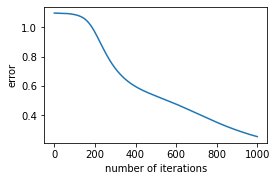

在测试集上的分类正确率为：100.00%


程序运行时间： 0.3399980068206787


In [16]:
if __name__ == "__main__":
    #读取数据文件
    X = np.loadtxt('iris.txt', delimiter=',', usecols=(0,1,2,3), dtype=float)
    Y = np.loadtxt('iris.txt', delimiter=',', usecols=(4), dtype=str)
   
    #将三个品种分别用0,1,2表示
    for i in range(Y.shape[0]):
        if Y[i] == 'Iris-setosa':
            Y[i] = 0
        elif Y[i] == 'Iris-versicolor':
            Y[i] = 1
        elif Y[i] == 'Iris-virginica':
            Y[i] = 2
    Y = Y.astype(np.int)
    Y = Y[:, np.newaxis]
    
    X_train, Y_train, X_test, Y_test = split_data(X, Y) #划分数据集
    
    #一系列参数
    input_num = 4
    output_num = 3
    hidden_num = 3
    num_iterations = 1000
    learning_rate = 0.1
    lamb = 0.001
    
    print("隐藏层神经元个数：%d" % hidden_num)
    print("学习率：%s" % str(learning_rate))
    print("迭代次数：%d" % num_iterations)
    print("正则化系数：%s" % str(lamb))
    print("\n")
    
    begin_time = time()
    
    #训练
    params = neural_network(X_train, Y_train, hidden_num, output_num, num_iterations, learning_rate, lamb)
    
    #测试
    test_num = X_test.shape[1]
    A2_test, cache_test = forward_propagation(X_test, params, output_num)
    predictions = np.argmax(A2_test, axis=0).reshape((1,test_num))
    correct = 0
    for i in range(test_num):
        if (predictions[0, i] == Y_test[0, i]):
            correct += 1
    precision = correct / test_num
    print ("在测试集上的分类正确率为：%.2f%%" % (precision * 100))
    
    print("\n")
    end_time = time()
    run_time = end_time - begin_time
    print("程序运行时间：", run_time)
    